# <center> Introduction to Tensorflow </center>


## Simple Operations
---


In [1]:

import matplotlib.pyplot as plt
import sklearn as sk
import tensorflow as tf
import numpy as np
import tensorboard as tb

%load_ext tensorboard

from tensorboard import *
from IPython.display import IFrame
from datetime import datetime
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale


In [2]:

a = tf.constant(5,   name="a")
b = tf.constant(-10, name="b")
c = tf.constant(8,   name="c")
@tf.function
def simple_operations():
    return (a * b) + c

print((a * b) + c)

tf.Tensor(-42, shape=(), dtype=int32)


In [3]:
a = tf.constant(tf.ones((2, 3), dtype=tf.int32), name="a") + tf.constant(
    tf.reshape(tf.range(1, 7), (2, 3)), name="b")

@tf.function
def simple_embeding_oprations():
    return a

print(a)

tf.Tensor(
[[2 3 4]
 [5 6 7]], shape=(2, 3), dtype=int32)


In [4]:
x = tf.constant([[1], [3], [5]])
y = tf.constant([[2, 4, 6]])
C = x @ y

@tf.function
def simple_post_operations():
    return C

print(C)

tf.Tensor(
[[ 2  4  6]
 [ 6 12 18]
 [10 20 30]], shape=(3, 3), dtype=int32)


In [32]:

# for tensorflow 2.3 track data workflow in train, test, backtraking

# tf.profiler.experimental.start(logdir, tf.profiler.experimental.ProfilerOptions(host_tracer_level=2))
# tf.profiler.experimental.stop()
# %tensorboard --logdir "logs" --host 127.0.0.13 --port 8088
# IFrame("http://127.0.0.12:8088",900, 600)


## Linear Regression with Tensorflow.
---

<br>
<center> $ Y = w_0 + x_1 * w_1 $ </center>



In [5]:

boston_dataset = load_boston()
X = boston_dataset.data
Y = boston_dataset.target
n, p = X.shape

In [6]:

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

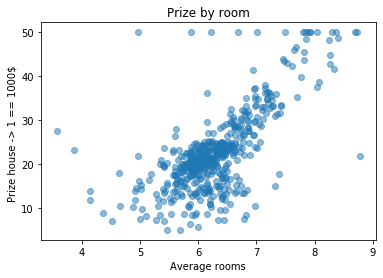

In [14]:
_X = (X[:, 5])
_Y = (Y)

plt.title('Prize by room')
plt.ylabel('Prize house -> 1 == 1000$ ')
plt.xlabel('Average rooms')

plt.scatter(_X, _Y, alpha=0.5)
plt.show()

In [8]:
class Model(object):
    def __init__(self):
        self._W0 = tf.Variable(tf.random.normal([1]))
        self._W1 = tf.Variable(tf.random.normal([1]))

    def __call__(self, _X):
        return _X * self._W1 + self._W0
    
def loss(target_y, predicted_y):
    return  tf.reduce_mean(tf.square(target_y - predicted_y))

def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(outputs, model(inputs))
    dW, db = t.gradient(current_loss, [model._W1, model._W0])
        
    model._W1.assign_sub(learning_rate * dW)
    model._W0.assign_sub(learning_rate * db)
    

In [15]:
    
model = Model()
epochs = range(100)

# very very very important
_X = scale(_X)
_Y = scale(_Y)

# track metrics directly in tensorflow

logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
file_writer = tf.summary.create_file_writer(logdir + "/metrics")
file_writer.set_as_default()

# train
for epoch in epochs:
    train(model, _X, _Y, learning_rate=0.1)
    
    # metrics
    y_predicted = model(_Y)
    accuracy = 100 - (tf.math.reduce_mean((_Y - y_predicted ) / _Y) * 100)
    
    tf.summary.scalar('Accuracy', data=accuracy, step=epoch)
    tf.summary.scalar('Loss', data=loss(_Y, y_predicted), step=epoch)

In [17]:
# view with tensorboard
# %tensorboard --logdir "logs/scalars" --host 127.0.0.13 --port 8088
# works, but for devs of tensorboard, not is important inform correctly

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 7200.

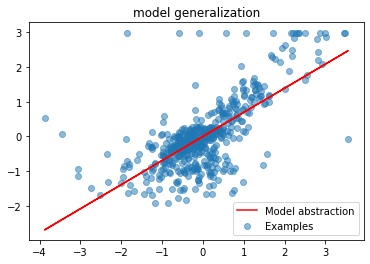

In [19]:
plt.title('model generalization')
plt.scatter(_X, _Y, alpha=0.5)
plt.plot(_X, model._W0 + model._W1 * _X, c="red")
plt.legend(['Model abstraction', 'Examples'])
plt.show()